#### Required

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
from scipy.stats import multivariate_normal

# Add the parent directory of simpleparameterisation to the sys.path list
sys.path.append('../simpleparamaterisation/')

# Now you can import simpleparameterisation from the new location
import TPCevt as TPC

det = TPC.Detector("Simple TPC with Atmospheric Ar (default values)")


In [3]:
import sys

# These are the usual ipython objects, including this one you are creating
ipython_vars = ['In', 'Out', 'exit', 'quit', 'get_ipython', 'ipython_vars']

# Get a sorted list of the objects and their sizes
sorted([(x, sys.getsizeof(globals().get(x))) for x in dir() if not x.startswith('_') and x not in sys.modules and x not in ipython_vars], key=lambda x: x[1], reverse=True)

[('open', 152),
 ('TPC', 72),
 ('np', 72),
 ('pd', 72),
 ('plt', 72),
 ('det', 56),
 ('multivariate_normal', 56)]

#### Programs

In [4]:

pitch_x = 0.4
pitch_y = 0.4

rv = multivariate_normal([0,0], np.diag([det.PSFstd, det.PSFstd]))

Define the function

In [5]:

def getDistribution(grid_size):
    x, y = np.mgrid[-grid_size*pitch_x:(grid_size+1)*pitch_x:pitch_x,
            -grid_size*pitch_y:(grid_size+1)*pitch_y:pitch_y
            ]
    pos = np.stack((x, y), axis =-1)
    gain = np.random.exponential(scale=det.gain_mean)
    top_right = np.stack((np.array([x+pitch_x/2, y+pitch_y/2])), axis=-1)
    bottom = np.stack((np.array([x+pitch_x/2, y-pitch_y/2])), axis=-1)
    left = np.stack((np.array([x-pitch_x/2, y+pitch_y/2])), axis=-1)
    bottom_left = np.stack((np.array([x-pitch_x/2, y-pitch_y/2])), axis=-1)
    
    # print((x,y))
    # print(pos[0][0])
    # print(bottom[0][0])
    # print(left[0][0])
    # print(bottom_left[0][0])
    
    
    # print('cdf pos time')
    # %timeit v = rv.cdf(pos)
    
    # print('pdf pos time')
    # %timeit v = rv.pdf(pos)
    
    gain=1 #not considering gain effect for temporary
    
    val_cdf = (rv.cdf(top_right) - rv.cdf(bottom) - rv.cdf(left) + rv.cdf(bottom_left))*gain
    # print(val_cdf)
    
    val_pdf = rv.pdf(pos)*gain*pitch_x*pitch_y
    # print(val_pdf)
    
    plt.figure()
    plt.title('Val CDF')
    plt.scatter(x, y, c=val_cdf)
    plt.colorbar()
    
    plt.figure()
    plt.title('Val PDF')
    plt.scatter(x, y, c=val_pdf)
    plt.colorbar()
    return x, y, val_cdf

def plot2D(x, y, value):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    contour = ax.contourf(x, y, value)
    cbar = plt.colorbar(contour)
    plt.show()

Let's create 2 Distribution for this example

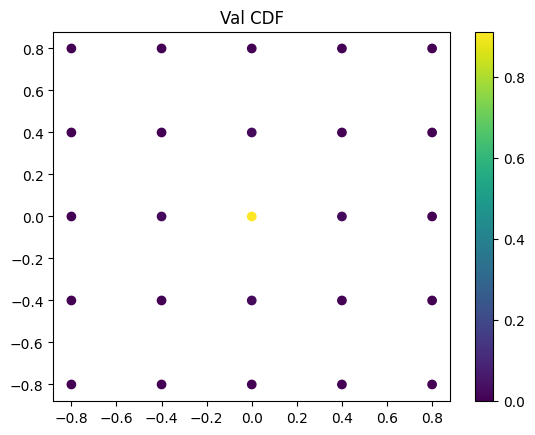

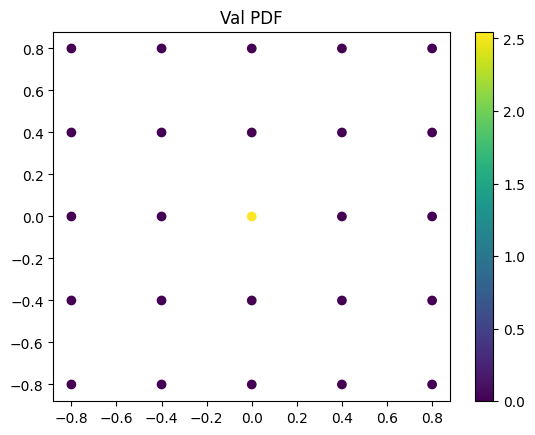

In [6]:
# First, create a distribution with size=2
x_1, y_1, readout_1 = getDistribution(2)

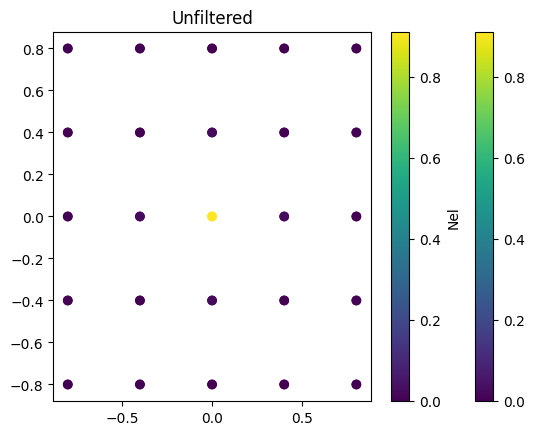

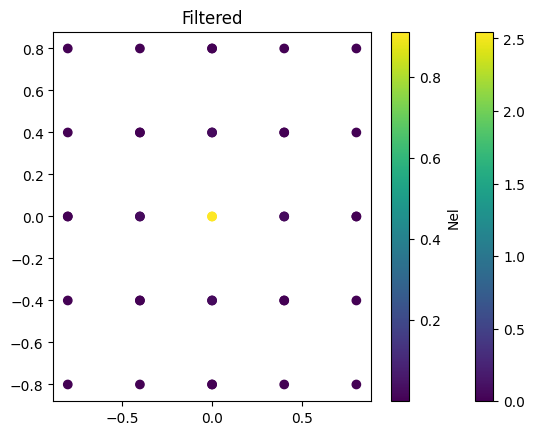

In [7]:
# First, create a distribution with size=2
x_1, y_1, readout_1 = getDistribution(2)

# Apply the threshold 
thresh = 1e-10
mask_1 = readout_1 >= thresh
x_1_filtered = x_1[mask_1].flatten()
y_1_filtered = y_1[mask_1].flatten()
readout_1_filtered = readout_1[mask_1]

# See the plot
plt.figure(1)
plt.title("Unfiltered")
plt.scatter(x_1, y_1, c = readout_1)
plt.colorbar().set_label('Nel')  # Set the label for the colorbar

plt.figure(2)
plt.title('Filtered')
plt.scatter(x_1_filtered, y_1_filtered, c = readout_1_filtered)
plt.colorbar().set_label('Nel')  # Set the label for the colorbar

filtered_1 = np.stack((x_1_filtered, y_1_filtered, readout_1_filtered))
unfiltered_1 = np.stack((x_1, y_1, readout_1))

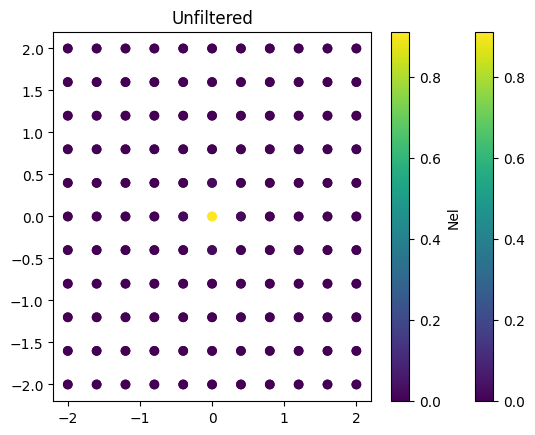

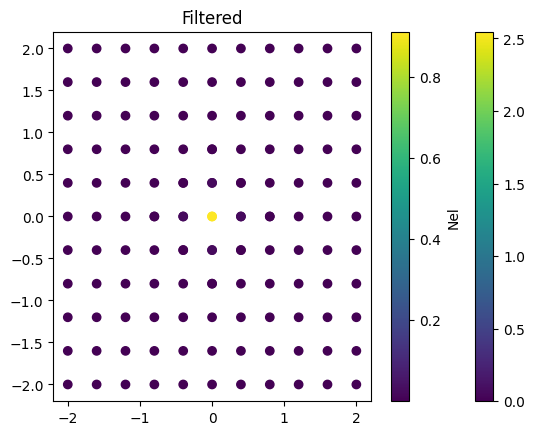

In [8]:
# Then, create another distribution with size=5
x_2, y_2, readout_2 = getDistribution(5)

# Apply the threshold 
thresh = 1e-10
mask_1 = readout_2 >= thresh
x_1_filtered = x_2[mask_1].flatten()
y_1_filtered = y_2[mask_1].flatten()
readout_2_filtered = readout_2[mask_1]

# See the plot
plt.figure(1)
plt.title("Unfiltered")
plt.scatter(x_2, y_2, c = readout_2)
plt.colorbar().set_label('Nel')  # Set the label for the colorbar

plt.figure(2)
plt.title('Filtered')
plt.scatter(x_1_filtered, y_1_filtered, c = readout_2_filtered)
plt.colorbar().set_label('Nel')  # Set the label for the colorbar


filtered_2 = np.stack((x_1_filtered, y_1_filtered, readout_2_filtered))
unfiltered_2 = np.stack((x_2, y_2, readout_2))

Then transform both distribution with each center to a global coordinate

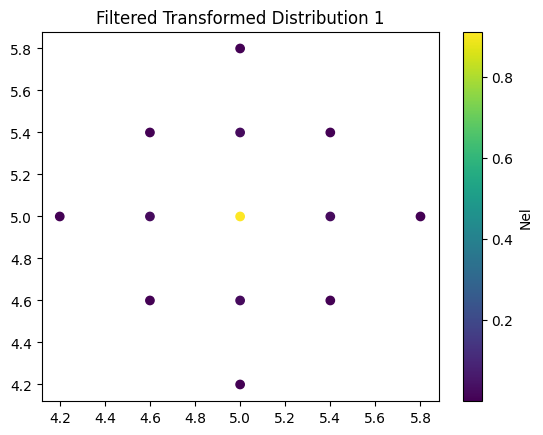

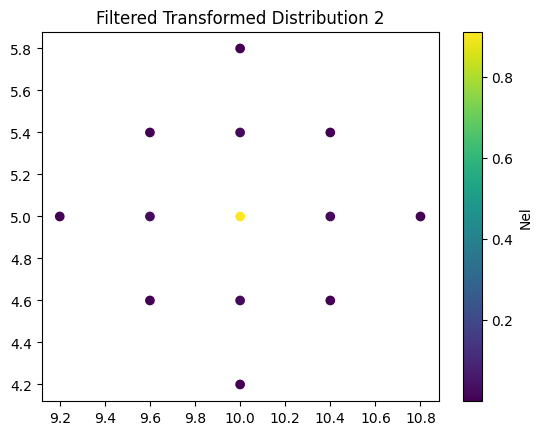

In [9]:
# The centre of each first and second distribution
DriftedEvt = [[5,5], [10, 5]]

global_filtered_1 = filtered_1
global_filtered_1[0] = filtered_1[0]+DriftedEvt[0][0] # x value of DriftedEvt1
global_filtered_1[1] = filtered_1[1]+DriftedEvt[0][1] # y value of DriftedEvt1

global_filtered_2 = filtered_2
global_filtered_2[0] = filtered_2[0]+DriftedEvt[1][0] # x value of DriftedEvt1
global_filtered_2[1] = filtered_2[1]+DriftedEvt[1][1] # y value of DriftedEvt1

# print(global_filtered_1, '\n')
# print(global_filtered_2)

# See the plot
plt.figure(3)
plt.title('Filtered Transformed Distribution 1')
plt.scatter(global_filtered_1[0], global_filtered_1[1], c = global_filtered_1[2])
plt.colorbar().set_label('Nel')  # Set the label for the colorbar

plt.figure(4)
plt.title('Filtered Transformed Distribution 2')
plt.scatter(global_filtered_2[0], global_filtered_2[1], c = global_filtered_2[2])
plt.colorbar().set_label('Nel')  # Set the label for the colorbar


Then show both in a single chart

(3.87, 11.13, 4.12, 5.880000000000001)

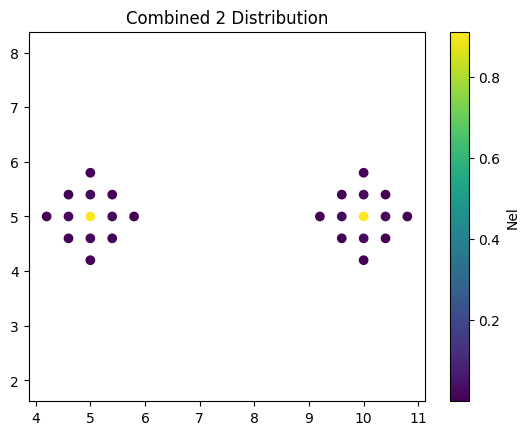

In [10]:
global_coordinate_x = np.concatenate((global_filtered_1[0], global_filtered_2[0]))
global_coordinate_y = np.concatenate((global_filtered_1[1], global_filtered_2[1]))
global_coordinate_val = np.concatenate((global_filtered_1[2], global_filtered_2[2]))

plt.figure(5)
plt.title('Combined 2 Distribution')
plt.scatter(global_coordinate_x, global_coordinate_y, c = global_coordinate_val)
plt.colorbar().set_label('Nel')  # Set the label for the colorbar
plt.axis('equal')